# Step 1: Understanding Dataset


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tensorflow
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model

In [21]:
df = pd.read_csv('gas_turbines.csv')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [22]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [23]:
df.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

# Step 2: Data Preprocessing


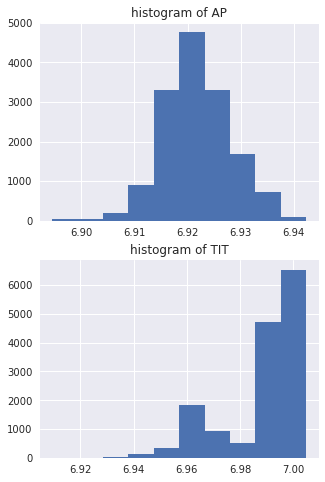

In [24]:
# natural logarithm scaling (+1 to prevent errors at 0)
df.loc[:, ['AP', 'TIT']] = df.loc[:, ['AP', 'TIT']].apply(lambda x: np.log(x + 1), axis = 1)
# visualizing
fig, ax = plt.subplots(2, figsize = (5, 8))
ax[0].hist(df['AP'])
ax[0].title.set_text('histogram of AP')
ax[1].hist(df['TIT'])
ax[1].title.set_text('histogram of TIT')

In [25]:
features = df.drop(['TEY'], axis = 1)
labels = df['TEY'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size = 0.2, random_state = 42)

In [26]:
# fitting scaler
sc_features = StandardScaler()
# transforming features
X_test = sc_features.fit_transform(X_test)
X_train = sc_features.transform(X_train)
# features
X_test = pd.DataFrame(X_test, columns = features.columns)
X_train = pd.DataFrame(X_train, columns = features.columns)
# labels
y_test = pd.DataFrame(y_test, columns = ['TEY'])
y_train = pd.DataFrame(y_train, columns = ['TEY'])
X_train.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,0.463702,-0.800626,0.536042,-0.761598,-1.346815,-1.633942,0.597566,-1.516645,1.316683,-1.252067
1,1.860812,-0.213791,-0.826876,0.420235,0.304513,0.684380,0.588540,0.212573,0.342177,-0.445416
2,-1.056912,0.402448,0.003336,2.045632,1.749126,0.949319,-1.900120,1.719864,-0.754858,-0.559576
3,0.096629,-1.517252,-0.881814,0.835495,-0.059461,0.258206,0.584672,-0.099031,-0.378965,0.594639
4,0.414190,-0.419732,0.303511,-0.037612,0.032733,0.436120,0.571777,-0.057363,-0.311480,-0.138919


# Step 3: Hyperparameter/ Experiment Results


In [27]:
model = Sequential()
# input layer + 1st hidden layer
model.add(Dense(6, input_dim=10, activation='relu'))
# 2nd hidden layer
model.add(Dense(6, activation='relu'))
# output layer
model.add(Dense(6, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'relu'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 6)                 66        
_________________________________________________________________
dense_13 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 42        
_________________________________________________________________
dropout_3 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 7         
Total params: 157
Trainable params: 157
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile Model
# Compile model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(optimizer = 'adam', metrics=['accuracy'], loss ='binary_crossentropy')
# Train Model
# evaluate the model
#scores = model.evaluate(X_train, y_train)
#print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 10, epochs = 10)

Epoch 1/10
1204/1204 [==============================] - 4s 3ms/step - loss: -1161.2825 - accuracy: 0.0000e+00 - val_loss: -2027.4473 - val_accuracy: 0.0000e+00
Epoch 2/10
1204/1204 [==============================] - 4s 3ms/step - loss: -1789.8682 - accuracy: 0.0000e+00 - val_loss: -2027.4473 - val_accuracy: 0.0000e+00
Epoch 3/10
1204/1204 [==============================] - 3s 3ms/step - loss: -1827.3176 - accuracy: 0.0000e+00 - val_loss: -2027.4473 - val_accuracy: 0.0000e+00
Epoch 4/10
1204/1204 [==============================] - 4s 3ms/step - loss: -1867.5138 - accuracy: 0.0000e+00 - val_loss: -2027.4473 - val_accuracy: 0.0000e+00
Epoch 5/10
1204/1204 [==============================] - 3s 3ms/step - loss: -1936.4120 - accuracy: 0.0000e+00 - val_loss: -2027.4473 - val_accuracy: 0.0000e+00
Epoch 6/10
1204/1204 [==============================] - 3s 3ms/step - loss: -2013.0970 - accuracy: 0.0000e+00 - val_loss: -2027.4473 - val_accuracy: 0.0000e+00
Epoch 7/10
1204/1204 [==================

In [29]:
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, valid_acc = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Valid: %.3f' % (train_acc, valid_acc))

Train: 0.000, Valid: 0.000


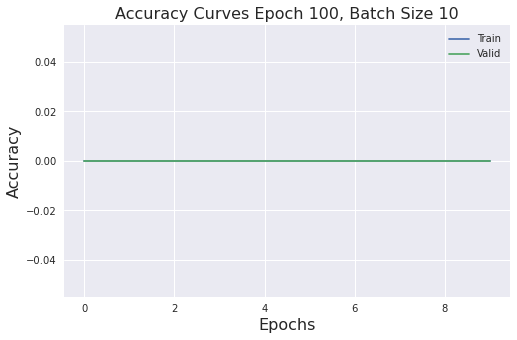

In [30]:
plt.figure(figsize=[8,5])
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Valid')
plt.legend()
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves Epoch 100, Batch Size 10', fontsize=16)
plt.show()